<h1><span style="font-size:34px">AtliQ Hotels Data Analysis Project</span></h1>


In [1]:
import pandas as pd

***
###   1. Data Import and Data Exploration
***

<span style="font-size:24px; font-weight:bold">Datasets</span>

We have 5 CSV files:

- dim_date.csv
- dim_hotels.csv
- dim_rooms.csv
- fact_aggregated_bookings
- fact_bookings.csv

**Read bookings data in a datagrame**

In [6]:
df_bookings = pd.read_csv("C:\\source-code\\fact_bookings.csv")

**Now I will just Explore bookings data**

In [8]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-2022,01-05-2022,02-05-2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-2022,01-05-2022,02-05-2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-2022,01-05-2022,04-05-2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-2022,01-05-2022,02-05-2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-2022,01-05-2022,02-05-2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [9]:
df_bookings.shape

(134590, 12)

In [10]:
df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [11]:
df_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [12]:
df_bookings.booking_platform.value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

<Axes: xlabel='booking_platform'>

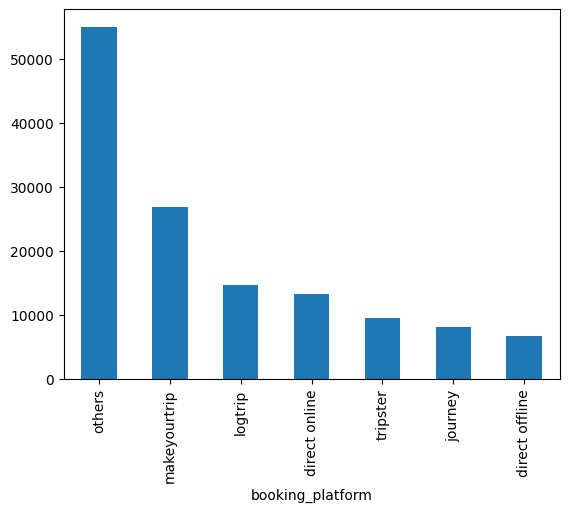

In [13]:
df_bookings.booking_platform.value_counts().plot(kind="bar")

In [14]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


**Now I will read the remaining files**

In [18]:
df_date = pd.read_csv("C:\\source-code\\dim_date.csv")
df_hotels = pd.read_csv("C:\\source-code\\dim_hotels.csv")
df_rooms = pd.read_csv("C:\\source-code\\dim_rooms.csv")
df_agg_bookings = pd.read_csv("C:\\source-code\\fact_aggregated_bookings.csv")

In [19]:
df_hotels.shape

(25, 4)

In [28]:
df_hotels.head(10)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi
5,16563,Atliq Palace,Business,Delhi
6,17558,Atliq Grands,Luxury,Mumbai
7,17559,Atliq Exotica,Luxury,Mumbai
8,17560,Atliq City,Business,Mumbai
9,17561,Atliq Blu,Luxury,Mumbai


In [21]:
df_hotels.category.value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

<Axes: xlabel='city'>

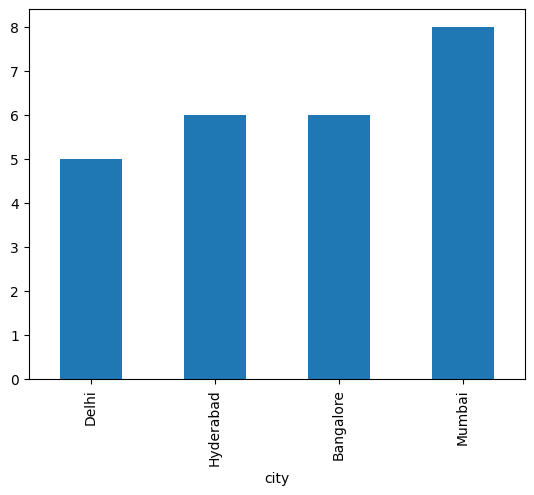

In [23]:
df_hotels.city.value_counts().sort_values().plot(kind="bar")

***
**Now will Explore aggregate bookings**
***

**Unique property ids in aggregate bookings dataset**

In [25]:
df_agg_bookings.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560], dtype=int64)

**Total bookings per property_id**

In [26]:
df_agg_bookings.groupby("property_id")["successful_bookings"].sum()

property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7211
17558    5053
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4737
19558    4400
19559    4729
19560    6079
19561    5736
19562    5812
19563    5413
Name: successful_bookings, dtype: int64

**days on which bookings are greater than capacity**

In [29]:
df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,01-May-22,RT1,30,19.0
12,16563,01-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,02-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


**properties that have highest capacity**

In [30]:
df_agg_bookings.capacity.max()

50.0

In [31]:
df_agg_bookings[df_agg_bookings.capacity==df_agg_bookings.capacity.max()]

,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,01-May-22,RT2,38,50.0
128,17558,02-May-22,RT2,27,50.0
229,17558,03-May-22,RT2,26,50.0
328,17558,04-May-22,RT2,27,50.0
428,17558,05-May-22,RT2,29,50.0
...,...,...,...,...,...
8728,17558,27-Jul-22,RT2,22,50.0
8828,17558,28-Jul-22,RT2,21,50.0
8928,17558,29-Jul-22,RT2,23,50.0
9028,17558,30-Jul-22,RT2,32,50.0


***
###   2. Data Cleaning
***

In [33]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


**(1) Clean invalid guests**

In [34]:
df_bookings[df_bookings.no_guests<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-2022,01-05-2022,02-05-2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-2022,01-05-2022,02-05-2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12-05-2022,12-05-2022,14-05-2022,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,08-05-2022,12-05-2022,14-05-2022,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,05-05-2022,12-05-2022,17-05-2022,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10-05-2022,12-05-2022,17-05-2022,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,05-06-2022,08-06-2022,13-06-2022,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-2022,20-07-2022,22-07-2022,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-2022,31-07-2022,01-08-2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


In [35]:
df_bookings = df_bookings[df_bookings.no_guests>0]

In [36]:
df_bookings.shape

(134578, 12)

**(2) Outlier removal in revenue generated**

In [37]:
df_bookings.revenue_generated.min(), df_bookings.revenue_generated.max()

(6500, 28560000)

In [38]:
df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.median()

(15378.036937686695, 13500.0)

In [39]:
avg, std = df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.std()

In [40]:
higher_limit = avg + 3*std
higher_limit

294498.50173207896

In [41]:
lower_limit = avg - 3*std
lower_limit

-263742.4278567056

In [42]:
df_bookings[df_bookings.revenue_generated<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [43]:
df_bookings[df_bookings.revenue_generated>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-2022,01-05-2022,04-05-2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-2022,01-05-2022,02-05-2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-2022,01-05-2022,04-05-2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-2022,01-05-2022,02-05-2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-2022,28-07-2022,29-07-2022,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [44]:
df_bookings = df_bookings[df_bookings.revenue_generated<=higher_limit]

In [45]:
df_bookings.shape

(134573, 12)

In [46]:
df_bookings.revenue_realized.describe()

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [47]:
higher_limit = df_bookings.revenue_realized.mean() + 3*df_bookings.revenue_realized.std()
higher_limit

33479.358661845814

In [48]:
df_bookings[df_bookings.revenue_realized>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-2022,01-05-2022,07-05-2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,01-05-2022,01-05-2022,02-05-2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-2022,01-05-2022,03-05-2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-2022,01-05-2022,07-05-2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-2022,01-05-2022,03-05-2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134328,Jul312219560RT49,19560,31-07-2022,31-07-2022,02-08-2022,6.0,RT4,direct online,5.0,Checked Out,39900,39900
134331,Jul312219560RT412,19560,31-07-2022,31-07-2022,01-08-2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-2022,31-07-2022,01-08-2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-2022,31-07-2022,06-08-2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


In [49]:
df_bookings[df_bookings.room_category=="RT4"].revenue_realized.describe()

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [50]:
# mean + 3*standard deviation
23439+3*9048

50583

In [51]:
df_bookings[df_bookings.booking_id=="May012216558RT213"]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [52]:
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

Total values in our dataframe is 134576. Out of that 77899 rows has null rating. Since there are many rows with null rating, we should not filter these values. Also we should not replace this rating with a median or mean rating etc 

(i) Now In aggregate bookings now will find the columns that have null values & Fill these null values 

In [54]:
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [55]:
df_agg_bookings[df_agg_bookings.capacity.isna()]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,01-May-22,RT1,22,NaN
14,17562,01-May-22,RT1,12,NaN


In [56]:
df_agg_bookings.capacity.median()

25.0

In [57]:
df_agg_bookings.capacity.fillna(df_agg_bookings.capacity.median(), inplace=True)

In [58]:
df_agg_bookings.loc[[8,15]]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,01-May-22,RT1,22,25.0
15,17563,01-May-22,RT1,21,25.0


(ii) Now In aggregate bookings will find out records that have successful_bookings value greater than capacity & Filter those records**

In [59]:
df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,01-May-22,RT1,30,19.0
12,16563,01-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,02-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [60]:
df_agg_bookings.shape

(9200, 5)

In [62]:
df_agg_bookings = df_agg_bookings[df_agg_bookings.successful_bookings<=df_agg_bookings.capacity]
df_agg_bookings.shape

(9194, 5)

***
###   3. Data Transformation
***

**Create occupancy percentage column**

In [63]:
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30.0
1,19562,01-May-22,RT1,28,30.0
2,19563,01-May-22,RT1,23,30.0


In [64]:
df_agg_bookings['occ_pct'] = df_agg_bookings.apply(lambda row: row['successful_bookings']/row['capacity'], axis=1)

In [65]:
new_col = df_agg_bookings.apply(lambda row: row['successful_bookings']/row['capacity'], axis=1)
df_agg_bookings = df_agg_bookings.assign(occ_pct=new_col.values)
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,01-May-22,RT1,25,30.0,0.833333
1,19562,01-May-22,RT1,28,30.0,0.933333
2,19563,01-May-22,RT1,23,30.0,0.766667


Now will Convert it to a percentage value

In [66]:
df_agg_bookings['occ_pct'] = df_agg_bookings['occ_pct'].apply(lambda x: round(x*100, 2))
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,01-May-22,RT1,25,30.0,83.33
1,19562,01-May-22,RT1,28,30.0,93.33
2,19563,01-May-22,RT1,23,30.0,76.67


In [67]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-2022,01-05-2022,02-05-2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-2022,01-05-2022,02-05-2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,01-05-2022,01-05-2022,03-05-2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-2022,01-05-2022,06-05-2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-2022,01-05-2022,03-05-2022,2.0,RT1,logtrip,NaN,No Show,9100,9100


In [68]:
df_agg_bookings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9194 entries, 0 to 9199
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          9194 non-null   int64  
 1   check_in_date        9194 non-null   object 
 2   room_category        9194 non-null   object 
 3   successful_bookings  9194 non-null   int64  
 4   capacity             9194 non-null   float64
 5   occ_pct              9194 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 502.8+ KB


***
###   4. Insights Generation
***

**1. What is an average occupancy rate in each of the room categories?**

In [70]:
df_agg_bookings.head(6)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,01-May-22,RT1,25,30.0,83.33
1,19562,01-May-22,RT1,28,30.0,93.33
2,19563,01-May-22,RT1,23,30.0,76.67
4,16558,01-May-22,RT1,18,19.0,94.74
5,17560,01-May-22,RT1,28,40.0,70.00
6,19558,01-May-22,RT1,25,40.0,62.50


In [76]:
df_agg_bookings.groupby("room_category")["occ_pct"].mean().round(2)

room_category
RT1    57.89
RT2    58.01
RT3    58.03
RT4    59.28
Name: occ_pct, dtype: float64

In [78]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [79]:
df = pd.merge(df_agg_bookings, df_rooms, left_on="room_category", right_on="room_id")
df.tail(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class
9190,16559,31-Jul-22,RT4,13,18.0,72.22,RT4,Presidential
9191,17558,31-Jul-22,RT4,3,6.0,50.00,RT4,Presidential
9192,19563,31-Jul-22,RT4,3,6.0,50.00,RT4,Presidential
9193,17561,31-Jul-22,RT4,3,4.0,75.00,RT4,Presidential


In [73]:
df.drop("room_id",axis=1, inplace=True)
df.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,01-May-22,RT1,25,30.0,83.33,Standard
1,19562,01-May-22,RT1,28,30.0,93.33,Standard
2,19563,01-May-22,RT1,23,30.0,76.67,Standard
3,16558,01-May-22,RT1,18,19.0,94.74,Standard


In [74]:
df.groupby("room_class")["occ_pct"].mean()

room_class
Elite           58.009756
Premium         58.028213
Presidential    59.277925
Standard        57.889643
Name: occ_pct, dtype: float64

In [75]:
df[df.room_class=="Standard"].occ_pct.mean()

57.88964285714285

**2. Print average occupancy rate per city**

In [80]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [81]:
df = pd.merge(df, df_hotels, on="property_id")
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class,property_name,category,city
0,16559,01-May-22,RT1,25,30.0,83.33,RT1,Standard,Atliq Exotica,Luxury,Mumbai
1,16559,02-May-22,RT1,20,30.0,66.67,RT1,Standard,Atliq Exotica,Luxury,Mumbai
2,16559,03-May-22,RT1,17,30.0,56.67,RT1,Standard,Atliq Exotica,Luxury,Mumbai


In [82]:
df.groupby("city")["occ_pct"].mean()

city
Bangalore    56.332376
Delhi        61.507341
Hyderabad    58.120652
Mumbai       57.909181
Name: occ_pct, dtype: float64

<Axes: xlabel='city'>

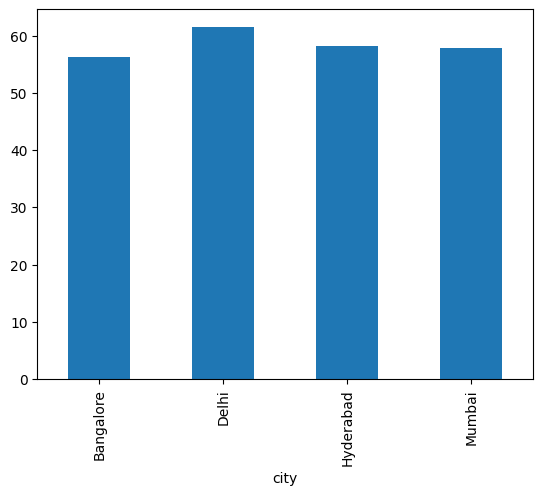

In [83]:
df.groupby("city")["occ_pct"].mean().plot(kind="bar")

**3. When was the occupancy better? Weekday or Weekend?**

In [84]:
df_date.head(3)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday


In [85]:
df_date

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday
...,...,...,...,...
87,27-Jul-22,Jul 22,W 31,weekeday
88,28-Jul-22,Jul 22,W 31,weekeday
89,29-Jul-22,Jul 22,W 31,weekeday
90,30-Jul-22,Jul 22,W 31,weekend


In [86]:
df = pd.merge(df, df_date, left_on="check_in_date", right_on="date")
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,16559,01-May-22,RT1,25,30.0,83.33,RT1,Standard,Atliq Exotica,Luxury,Mumbai,01-May-22,May 22,W 19,weekend
1,16559,01-May-22,RT2,35,41.0,85.37,RT2,Elite,Atliq Exotica,Luxury,Mumbai,01-May-22,May 22,W 19,weekend
2,16559,01-May-22,RT3,27,32.0,84.38,RT3,Premium,Atliq Exotica,Luxury,Mumbai,01-May-22,May 22,W 19,weekend


In [87]:
df.groupby("day_type")["occ_pct"].mean().round(2)

day_type
weekeday    51.81
weekend     73.96
Name: occ_pct, dtype: float64

**4: In the month of June, what is the occupancy for different cities**

In [88]:
df["mmm yy"].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [89]:
df_june_22 = df[df["mmm yy"]=="Jun 22"]
df_june_22.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class,property_name,category,city,date,mmm yy,week no,day_type
3098,16559,01-Jun-22,RT1,14,30.0,46.67,RT1,Standard,Atliq Exotica,Luxury,Mumbai,01-Jun-22,Jun 22,W 23,weekeday
3099,16559,01-Jun-22,RT2,21,41.0,51.22,RT2,Elite,Atliq Exotica,Luxury,Mumbai,01-Jun-22,Jun 22,W 23,weekeday
3100,16559,01-Jun-22,RT3,15,32.0,46.88,RT3,Premium,Atliq Exotica,Luxury,Mumbai,01-Jun-22,Jun 22,W 23,weekeday
3101,16559,01-Jun-22,RT4,8,18.0,44.44,RT4,Presidential,Atliq Exotica,Luxury,Mumbai,01-Jun-22,Jun 22,W 23,weekeday


In [90]:
df_june_22.groupby('city')['occ_pct'].mean().round(2).sort_values(ascending=False)

city
Delhi        61.46
Mumbai       57.79
Hyderabad    57.69
Bangalore    55.85
Name: occ_pct, dtype: float64

<Axes: xlabel='city'>

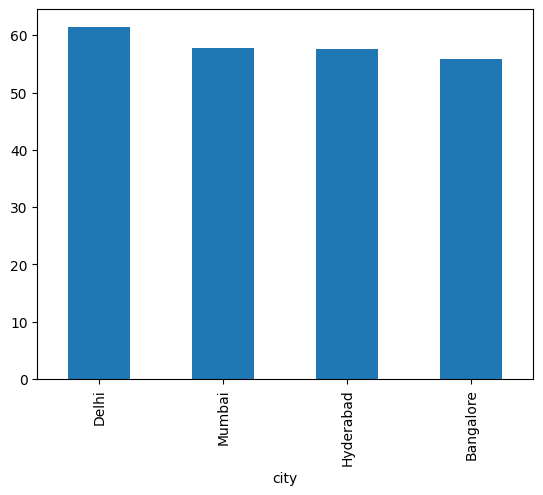

In [91]:
df_june_22.groupby('city')['occ_pct'].mean().round(2).sort_values(ascending=False).plot(kind="bar")

**5: We got new data for the month of august. Append that to existing data**

In [93]:
df_august = pd.read_csv("C:\\source-code\\new_data_august.csv")
df_august.head(3)

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67


In [94]:
df_august.columns

Index(['property_id', 'property_name', 'category', 'city', 'room_category',
       'room_class', 'check_in_date', 'mmm yy', 'week no', 'day_type',
       'successful_bookings', 'capacity', 'occ%'],
      dtype='object')

In [95]:
df.columns

Index(['property_id', 'check_in_date', 'room_category', 'successful_bookings',
       'capacity', 'occ_pct', 'room_id', 'room_class', 'property_name',
       'category', 'city', 'date', 'mmm yy', 'week no', 'day_type'],
      dtype='object')

In [98]:
df_august.shape

(7, 13)

In [99]:
df.shape

(9194, 15)

In [101]:
latest_df = pd.concat([df, df_august], ignore_index = True, axis = 0)
latest_df.tail(10)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class,property_name,category,city,date,mmm yy,week no,day_type,occ%
9191,16563,31-Jul-22,RT2,32,38.0,84.21,RT2,Elite,Atliq Palace,Business,Delhi,31-Jul-22,Jul 22,W 32,weekend,NaN
9192,16563,31-Jul-22,RT3,14,20.0,70.00,RT3,Premium,Atliq Palace,Business,Delhi,31-Jul-22,Jul 22,W 32,weekend,NaN
9193,16563,31-Jul-22,RT4,13,18.0,72.22,RT4,Presidential,Atliq Palace,Business,Delhi,31-Jul-22,Jul 22,W 32,weekend,NaN
9194,16559,01-Aug-22,RT1,30,30.0,NaN,NaN,Standard,Atliq Exotica,Luxury,Mumbai,NaN,Aug-22,W 32,weekeday,100.00
9195,19562,01-Aug-22,RT1,21,30.0,NaN,NaN,Standard,Atliq Bay,Luxury,Bangalore,NaN,Aug-22,W 32,weekeday,70.00
9196,19563,01-Aug-22,RT1,23,30.0,NaN,NaN,Standard,Atliq Palace,Business,Bangalore,NaN,Aug-22,W 32,weekeday,76.67
9197,19558,01-Aug-22,RT1,30,40.0,NaN,NaN,Standard,Atliq Grands,Luxury,Bangalore,NaN,Aug-22,W 32,weekeday,75.00
9198,19560,01-Aug-22,RT1,20,26.0,NaN,NaN,Standard,Atliq City,Business,Bangalore,NaN,Aug-22,W 32,weekeday,76.92
9199,17561,01-Aug-22,RT1,18,26.0,NaN,NaN,Standard,Atliq Blu,Luxury,Mumbai,NaN,Aug-22,W 32,weekeday,69.23
9200,17564,01-Aug-22,RT1,10,16.0,NaN,NaN,Standard,Atliq Seasons,Business,Mumbai,NaN,Aug-22,W 32,weekeday,62.50


In [102]:
latest_df.shape

(9201, 16)

**6. Print revenue realized per city**

In [104]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-2022,01-05-2022,02-05-2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-2022,01-05-2022,02-05-2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,01-05-2022,01-05-2022,03-05-2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-2022,01-05-2022,06-05-2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-2022,01-05-2022,03-05-2022,2.0,RT1,logtrip,NaN,No Show,9100,9100


In [105]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [106]:
df_bookings_all = pd.merge(df_bookings, df_hotels, on="property_id")
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-2022,01-05-2022,02-05-2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-2022,01-05-2022,02-05-2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,01-05-2022,01-05-2022,03-05-2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi


In [107]:
df_bookings_all.groupby("city")["revenue_realized"].sum()

city
Bangalore    420383550
Delhi        294404488
Hyderabad    325179310
Mumbai       668569251
Name: revenue_realized, dtype: int64

**7. Print month by month revenue**

In [109]:
df_date.head(3)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday


In [110]:
df_date["mmm yy"].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [111]:
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-2022,01-05-2022,02-05-2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-2022,01-05-2022,02-05-2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,01-05-2022,01-05-2022,03-05-2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi


In [116]:
df_date.head(3)

,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday


In [113]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [115]:
df_bookings_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134573 entries, 0 to 134572
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134573 non-null  object 
 1   property_id        134573 non-null  int64  
 2   booking_date       134573 non-null  object 
 3   check_in_date      134573 non-null  object 
 4   checkout_date      134573 non-null  object 
 5   no_guests          134573 non-null  float64
 6   room_category      134573 non-null  object 
 7   booking_platform   134573 non-null  object 
 8   ratings_given      56676 non-null   float64
 9   booking_status     134573 non-null  object 
 10  revenue_generated  134573 non-null  int64  
 11  revenue_realized   134573 non-null  int64  
 12  property_name      134573 non-null  object 
 13  category           134573 non-null  object 
 14  city               134573 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 1

In [121]:
df_date["date"] = pd.to_datetime(df_date["date"])
df_date.head(3)

,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday


In [122]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      92 non-null     datetime64[ns]
 1   mmm yy    92 non-null     object        
 2   week no   92 non-null     object        
 3   day_type  92 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 3.0+ KB


In [127]:
df_bookings_all["check_in_date"] = pd.to_datetime(df_bookings_all["check_in_date"])
df_bookings_all.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-2022,2022-05-01,02-05-2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-2022,2022-05-01,02-05-2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,01-05-2022,2022-05-01,03-05-2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-2022,2022-05-01,06-05-2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi


In [128]:
df_bookings_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134573 entries, 0 to 134572
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   booking_id         134573 non-null  object        
 1   property_id        134573 non-null  int64         
 2   booking_date       134573 non-null  object        
 3   check_in_date      134573 non-null  datetime64[ns]
 4   checkout_date      134573 non-null  object        
 5   no_guests          134573 non-null  float64       
 6   room_category      134573 non-null  object        
 7   booking_platform   134573 non-null  object        
 8   ratings_given      56676 non-null   float64       
 9   booking_status     134573 non-null  object        
 10  revenue_generated  134573 non-null  int64         
 11  revenue_realized   134573 non-null  int64         
 12  property_name      134573 non-null  object        
 13  category           134573 non-null  object  

In [129]:
df_bookings_all = pd.merge(df_bookings_all, df_date, left_on="check_in_date", right_on="date")
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May012216558RT12,16558,30-04-2022,2022-05-01,02-05-2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
1,May012216558RT15,16558,27-04-2022,2022-05-01,02-05-2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
2,May012216558RT16,16558,01-05-2022,2022-05-01,03-05-2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend


In [130]:
df_bookings_all.groupby("mmm yy")["revenue_realized"].sum()

mmm yy
Jul 22    572843348
Jun 22    553925855
May 22    581767396
Name: revenue_realized, dtype: int64

**(1) revenue realized per hotel type**

In [131]:
df_bookings_all.property_name.unique()

array(['Atliq Grands', 'Atliq Exotica', 'Atliq City', 'Atliq Blu',
       'Atliq Bay', 'Atliq Palace', 'Atliq Seasons'], dtype=object)

In [132]:
df_bookings_all.groupby("property_name")["revenue_realized"].sum().round(2).sort_values()

property_name
Atliq Seasons     66086735
Atliq Grands     211462134
Atliq Bay        259996918
Atliq Blu        260851922
Atliq City       285798439
Atliq Palace     304081863
Atliq Exotica    320258588
Name: revenue_realized, dtype: int64

**(2) average rating per city**

In [133]:
df_bookings_all.groupby("city")["ratings_given"].mean().round(2)

city
Bangalore    3.41
Delhi        3.78
Hyderabad    3.66
Mumbai       3.65
Name: ratings_given, dtype: float64

**(3) pie chart of revenue realized per booking platform**

<Axes: ylabel='revenue_realized'>

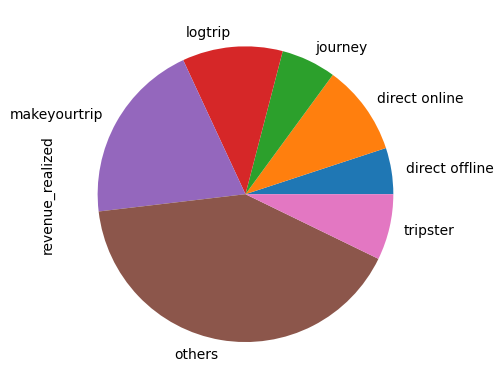

In [134]:
df_bookings_all.groupby("booking_platform")["revenue_realized"].sum().plot(kind="pie")